[*********************100%%**********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2003-01-02  1.657947  1.657947  1.570503  1.617723   0.908192   35309891
2003-01-09  1.617723  1.661445  1.575749  1.629965   0.915064   92928183
2003-01-10  1.643956  1.747141  1.633463  1.684181   0.945501  117881455
2003-01-13  1.678934  1.689427  1.610727  1.629965   0.915064   56390313
2003-01-14  1.626467  1.792612  1.622970  1.792612   1.006375  203699392


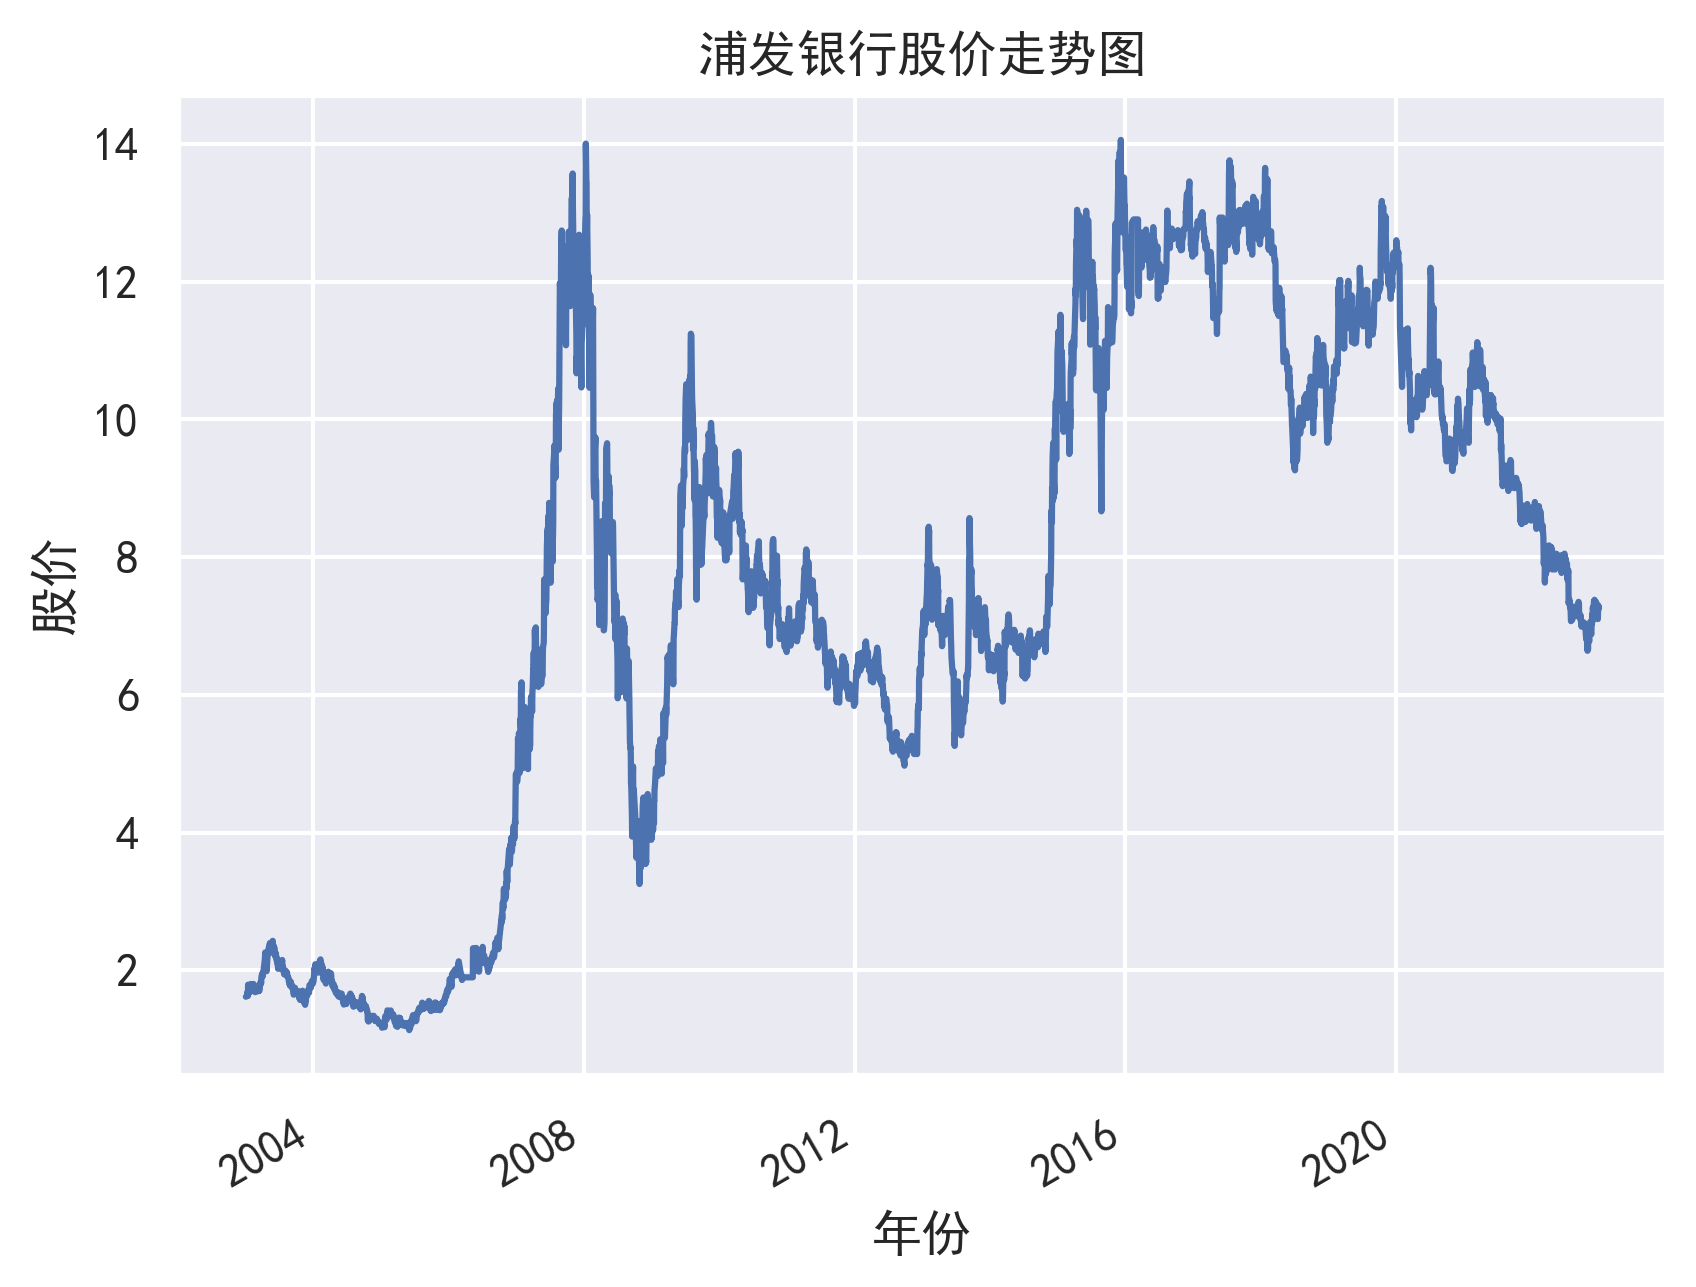

In [21]:
import yfinance as yf
import pandas as pd
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

import time
start_time = time.time()

# 设置股票代码和时间范围
stock_code = '600000.SS'  # 浦发银行的股票代码
start_date = '2003-01-01'
end_date = '2023-01-01'

# 获取股票数据
stock_data = yf.download(stock_code, start=start_date, end=end_date)

# 打印数据的前几行
print(stock_data.head())

# 绘制股价走势图
stock_data['Close'].plot(title='浦发银行股价走势图',ylabel='股价',xlabel='年份')
plt.show()

In [22]:
# 计算每天对应的股票收盘线，每20日平均价格均线M
stock_data['M'] = stock_data['Close'].rolling(window=20).mean()
stock_data['Date Diff'] = stock_data.index.to_series().diff().dt.days   # 休市天数
stock_data['Stock hold'] = 0    # 持有股票数量
stock_data['Stock Value Diff'] = 0    # 持有股票的总价值变化
stock_data['Cash'] = 0        # 现金
stock_data['Interest'] = 0  # 利息
stock_data['Invest'] = 0    # 投资金额
stock_data.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)

In [23]:
stock_data.tail()

,Close,M,Date Diff,Stock hold,Stock Value Diff,Cash,Interest,Invest
Date,,,,,,,,
2022-12-26,7.10,7.2645,3.0,0,0,0,0,0
2022-12-27,7.22,7.2620,1.0,0,0,0,0,0
2022-12-28,7.30,7.2660,1.0,0,0,0,0,0
2022-12-29,7.24,7.2670,1.0,0,0,0,0,0
2022-12-30,7.28,7.2695,1.0,0,0,0,0,0


In [24]:
# 获取每个月的工资
salary_old = 500.
salary_now = 10000.
duration = 20 * 12
salary_increase = (salary_now - salary_old) / (duration - 1)
salaries = [salary_old]
for i in range(1, duration):
    salaries.append(salary_old + salary_increase * i)

In [25]:
len(salaries), salaries[0], salaries[-1]

(240, 500.0, 10000.0)

In [26]:
# 初始化第一行
stock_data.loc[stock_data.index[0], 'Cash'] = salaries[0] / 2
stock_data.loc[stock_data.index[0], 'Stock hold'] = salaries[0] / 2 / stock_data.loc[stock_data.index[0], 'Close']

In [27]:
stock_data.head(25)

,Close,M,Date Diff,Stock hold,Stock Value Diff,Cash,Interest,Invest
Date,,,,,,,,
2003-01-02,1.617723,NaN,NaN,154.538201,0,250,0,0
2003-01-09,1.629965,NaN,7.0,0.000000,0,0,0,0
2003-01-10,1.684181,NaN,1.0,0.000000,0,0,0,0
2003-01-13,1.629965,NaN,3.0,0.000000,0,0,0,0
2003-01-14,1.792612,NaN,1.0,0.000000,0,0,0,0
2003-01-15,1.757634,NaN,1.0,0.000000,0,0,0,0
2003-01-16,1.748890,NaN,1.0,0.000000,0,0,0,0
2003-01-17,1.782119,NaN,1.0,0.000000,0,0,0,0
2003-01-20,1.738396,NaN,3.0,0.000000,0,0,0,0


In [28]:
k = 0.01
buy_threshold = k   # 买入阈值
sell_threshold = 2 * k  # 卖出阈值
Annualized_interest_rate = 0.01 # 年化利率

In [29]:
can_buySell = False # 是否可以买卖

In [30]:
for i in range(1, len(stock_data)):   # 从第二行开始
    year = stock_data.index[i].year
    month = stock_data.index[i].month
    day = stock_data.index[i].day
    # 这个月的工资
    salary_this_month = salaries[(year - 2003) * 12 + month - 1]    
    print(f'{year}-{month}-{day}')
    # 将上一行的数据更新到这一行
    stock_data.loc[stock_data.index[i], 'Cash'] = stock_data.loc[stock_data.index[i - 1], 'Cash']
    stock_data.loc[stock_data.index[i], 'Stock hold'] = stock_data.loc[stock_data.index[i - 1], 'Stock hold']
    # 计算利息  利息 = 休市天数 * Cash * 年化利率 / 365
    interest_today = stock_data.loc[stock_data.index[i], 'Date Diff'] * stock_data.loc[stock_data.index[i], 'Cash'] * Annualized_interest_rate / 365
    stock_data.loc[stock_data.index[i], 'Interest'] = interest_today
    # 更新Cash
    stock_data.loc[stock_data.index[i], 'Cash'] += interest_today
    # 如果和月份和前一行的不一样，则新的一月开始了，可以买卖了，发工资了
    if month != stock_data.index[i - 1].month:
        can_buySell = True  # 可以买卖
        stock_data.loc[stock_data.index[i], 'Cash'] += salary_this_month  # 发工资
    
    # 今日收盘价
    closing_today = stock_data.loc[stock_data.index[i], 'Close']
    # 昨日收盘价
    closing_yesterday = stock_data.loc[stock_data.index[i - 1], 'Close']
    # 计算股票价值变化（如果持有股票不为0）
    stock_data.loc[stock_data.index[i], 'Stock Value Diff'] = stock_data.loc[stock_data.index[i], 'Stock hold'] * (closing_today - closing_yesterday) if stock_data.loc[stock_data.index[i], 'Stock hold'] != 0 else 0
    
    # 今日M均线
    M_today = stock_data.loc[stock_data.index[i], 'M']
    # 如果可以买卖
    if can_buySell:
        # 如果今天的M均线不存在，则跳过
        if np.isnan(M_today):
            continue
        # 如果今天的收盘价高于M均线一定值，可以卖出
        if closing_today > M_today * (1 + sell_threshold) or stock_data.loc[stock_data.index[i], 'Stock hold'] != 0:
            stock_data.loc[stock_data.index[i], 'Cash'] += stock_data.loc[stock_data.index[i - 1], 'Stock hold'] * closing_today
            stock_data.loc[stock_data.index[i], 'Stock hold'] = 0
            can_buySell = False
        # 如果今天的收盘价低于M均线一定值，可以买入
        elif closing_today < M_today * (1 - buy_threshold):
            stock_data.loc[stock_data.index[i], 'Stock hold'] += salary_this_month / 2 / closing_today
            stock_data.loc[stock_data.index[i], 'Cash'] -= salary_this_month / 2
            # 更新投资
            stock_data.loc[stock_data.index[i], 'Invest'] += salary_this_month / 2
            can_buySell = False

2003-1-9
2003-1-10
2003-1-13
2003-1-14
2003-1-15
2003-1-16
2003-1-17
2003-1-20
2003-1-21
2003-1-22
2003-1-23
2003-1-24
2003-1-27
2003-1-28
2003-1-29
2003-2-10
2003-2-11
2003-2-12
2003-2-13
2003-2-14
2003-2-17
2003-2-18
2003-2-19
2003-2-20
2003-2-21
2003-2-24
2003-2-25
2003-2-26
2003-2-27
2003-2-28
2003-3-3
2003-3-4
2003-3-5
2003-3-6
2003-3-7
2003-3-10
2003-3-11
2003-3-12
2003-3-13
2003-3-14
2003-3-17
2003-3-18
2003-3-19
2003-3-20
2003-3-21
2003-3-24
2003-3-25
2003-3-26
2003-3-27
2003-3-28
2003-3-31
2003-4-1
2003-4-2
2003-4-3
2003-4-4
2003-4-7
2003-4-8
2003-4-9
2003-4-10
2003-4-11
2003-4-14
2003-4-15
2003-4-16
2003-4-17
2003-4-18
2003-4-21
2003-4-22
2003-4-23
2003-4-24
2003-4-28
2003-4-30
2003-5-12
2003-5-13
2003-5-14
2003-5-15
2003-5-16
2003-5-19
2003-5-20
2003-5-21
2003-5-22
2003-5-23
2003-5-26
2003-5-27
2003-5-28
2003-5-29
2003-5-30
2003-6-2
2003-6-3
2003-6-4
2003-6-5
2003-6-6
2003-6-9
2003-6-10
2003-6-11
2003-6-12
2003-6-13
2003-6-16
2003-6-17
2003-6-18
2003-6-19
2003-6-20
2003-6-23

In [31]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
stock_data.head(100)

,Close,M,Date Diff,Stock hold,Stock Value Diff,Cash,Interest,Invest
Date,,,,,,,,
2003-01-02,1.617723,NaN,NaN,154.538201,0.000000,250.000000,0.000000,0.000000
2003-01-09,1.629965,NaN,7.0,154.538201,1.891850,250.047945,0.047945,0.000000
2003-01-10,1.684181,NaN,1.0,154.538201,8.378447,250.054796,0.006851,0.000000
2003-01-13,1.629965,NaN,3.0,154.538201,-8.378447,250.075348,0.020552,0.000000
2003-01-14,1.792612,NaN,1.0,154.538201,25.135176,250.082200,0.006851,0.000000
2003-01-15,1.757634,NaN,1.0,154.538201,-5.405424,250.089051,0.006852,0.000000
2003-01-16,1.748890,NaN,1.0,154.538201,-1.351282,250.095903,0.006852,0.000000
2003-01-17,1.782119,NaN,1.0,154.538201,5.135149,250.102755,0.006852,0.000000
2003-01-20,1.738396,NaN,3.0,154.538201,-6.756872,250.123311,0.020556,0.000000


In [32]:
stock_data.tail(100)

,Close,M,Date Diff,Stock hold,Stock Value Diff,Cash,Interest,Invest
Date,,,,,,,,
2022-08-05,7.15,7.4750,1.0,0.000000,0.000000,1.308056e+06,35.836179,0.000000
2022-08-08,7.12,7.4375,3.0,0.000000,0.000000,1.308164e+06,107.511481,0.000000
2022-08-09,7.12,7.3980,1.0,0.000000,0.000000,1.308200e+06,35.840106,0.000000
2022-08-10,7.09,7.3600,1.0,0.000000,0.000000,1.308236e+06,35.841088,0.000000
2022-08-11,7.18,7.3295,1.0,0.000000,0.000000,1.308271e+06,35.842070,0.000000
2022-08-12,7.24,7.3080,1.0,0.000000,0.000000,1.308307e+06,35.843052,0.000000
2022-08-15,7.21,7.2790,3.0,0.000000,0.000000,1.308415e+06,107.532102,0.000000
2022-08-16,7.19,7.2480,1.0,0.000000,0.000000,1.308451e+06,35.846980,0.000000
2022-08-17,7.28,7.2225,1.0,0.000000,0.000000,1.308486e+06,35.847962,0.000000


In [33]:
# 最大收益
year_max_gain = stock_data['Stock Value Diff'].groupby(stock_data.index.year).max().apply(lambda x: 0 if x < 0 else x)
year_max_gain

Date
2003     25.135176
2004     22.030517
2005     64.463908
2006     40.350820
2007    142.435485
2008    175.795324
2009    177.644140
2010    108.973716
2011     93.657392
2012    217.032585
2013    252.832367
2014    296.255181
2015    267.284307
2016     99.759639
2017    324.010848
2018    131.696474
2019    108.982973
2020    132.165087
2021    124.740924
2022    147.778070
Name: Stock Value Diff, dtype: float64

In [34]:
# 最大回撤
year_max_drawdown = stock_data['Stock Value Diff'].groupby(stock_data.index.year).min().apply(lambda x: 0 if x > 0 else x)
year_max_drawdown

Date
2003    -15.176892
2004    -43.131625
2005    -40.248903
2006    -33.781103
2007    -99.922001
2008   -210.130046
2009   -103.212321
2010   -125.739137
2011    -73.939905
2012    -82.435724
2013   -190.497295
2014    -95.460462
2015   -320.741223
2016   -126.111300
2017    -59.853760
2018   -167.462984
2019   -140.461026
2020   -148.685280
2021   -210.769076
2022   -286.440778
Name: Stock Value Diff, dtype: float64

In [35]:
# 股票收益
year_gain = stock_data['Stock Value Diff'].groupby(stock_data.index.year).sum()
year_gain

Date
2003       5.521987
2004    -129.819339
2005      19.397152
2006      92.225339
2007     809.387193
2008   -1066.969650
2009    1023.287707
2010     111.069745
2011     120.158483
2012     821.975740
2013     -54.837151
2014     525.900835
2015     100.560430
2016    -105.924761
2017     242.609507
2018     195.815838
2019     160.763583
2020     263.316557
2021    -399.585262
2022    -127.899995
Name: Stock Value Diff, dtype: float64

In [36]:
# 投资总额
year_invest = stock_data['Invest'].groupby(stock_data.index.year).sum()
year_invest

Date
2003     1067.991632
2004     3098.326360
2005     3305.439331
2006     2109.832636
2007     3850.418410
2008     6246.861925
2009     7141.213389
2010    10193.514644
2011    11425.732218
2012    10122.384937
2013    10957.112971
2014    14764.644351
2015     9554.393305
2016    13759.414226
2017    18381.799163
2018    15726.987448
2019    16661.087866
2020    17615.062762
2021    18648.535565
2022    24483.263598
Name: Invest, dtype: float64

In [37]:
data= {
    '年份': list(range(2003, 2023)),
    '股票收益': year_gain,
    '收益率': 100 * year_gain / year_invest,
    '最大收益': year_max_gain,
    '最大回撤': year_max_drawdown,
}
df = pd.DataFrame(data)

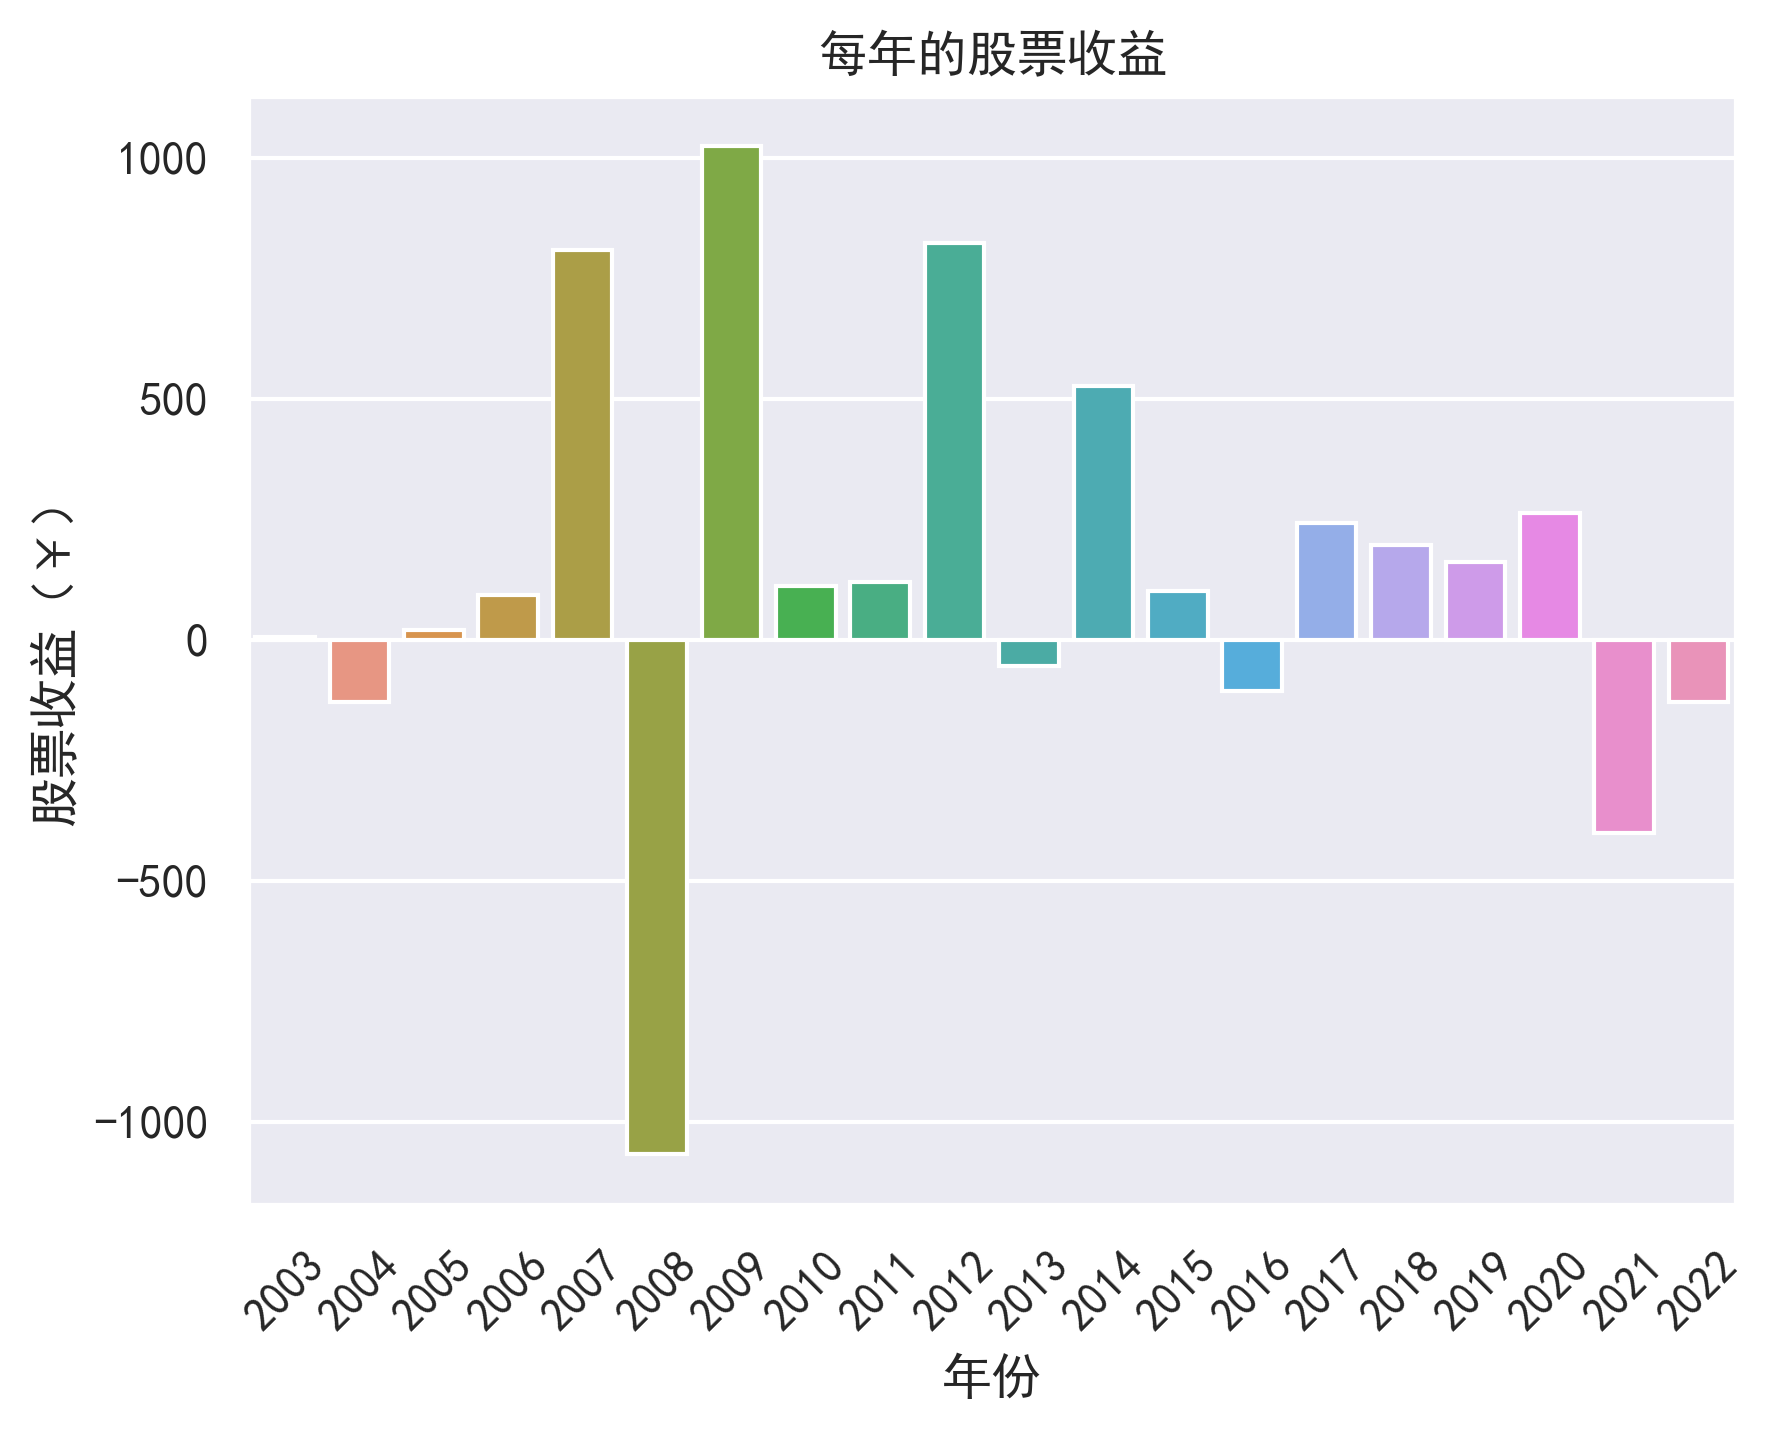

In [38]:
# 绘制每年的股票收益
sns.barplot(x='年份', y='股票收益', data=df)
plt.xticks(rotation=45)
plt.title('每年的股票收益')
plt.ylabel('股票收益（￥）')
plt.show()

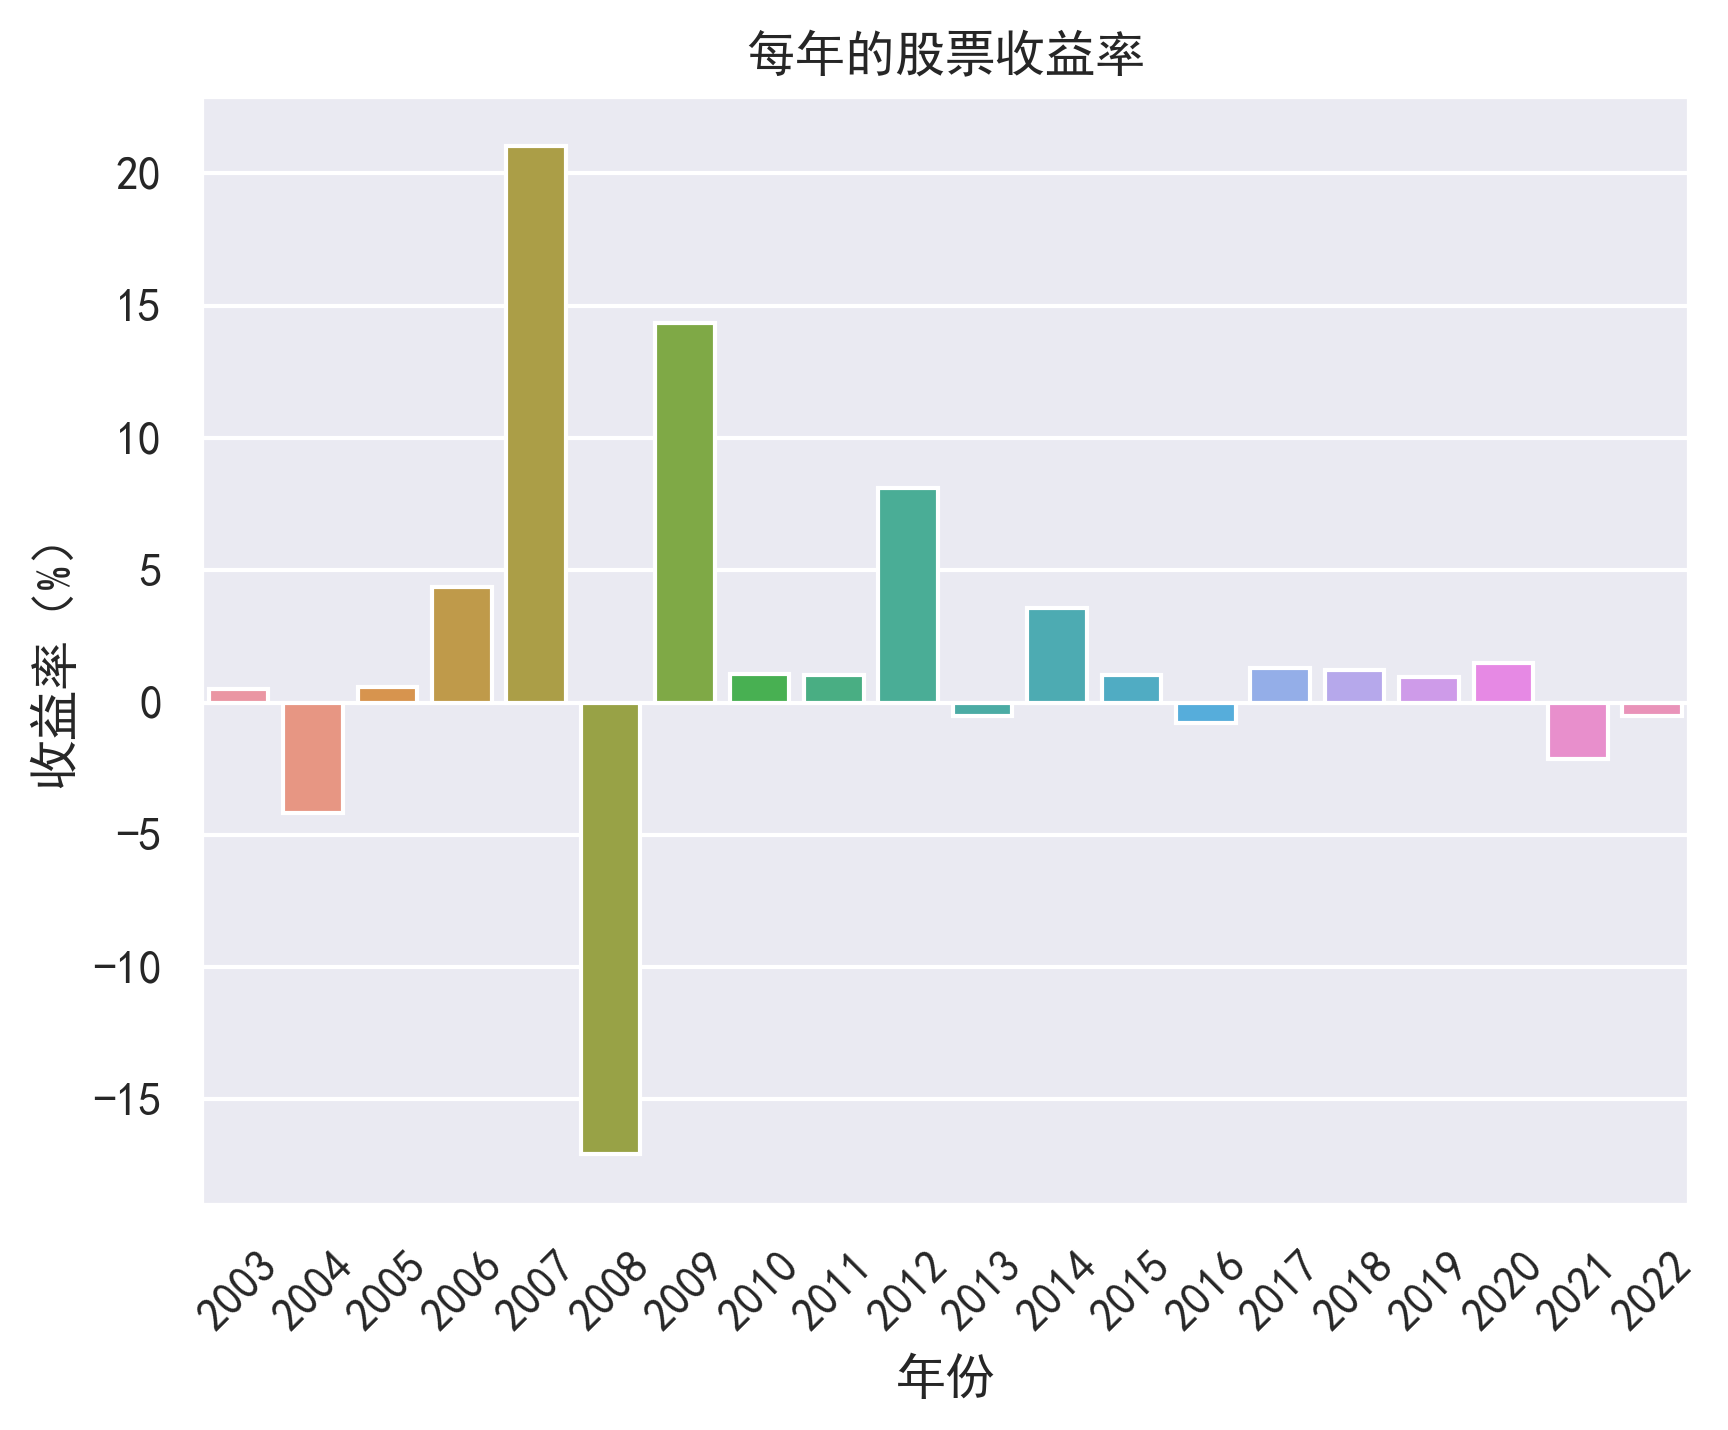

In [39]:
# 绘制每年的收益率
sns.barplot(x='年份', y='收益率', data=df)
plt.xticks(rotation=45)
plt.title('每年的股票收益率')
plt.ylabel('收益率（%）')
plt.show()

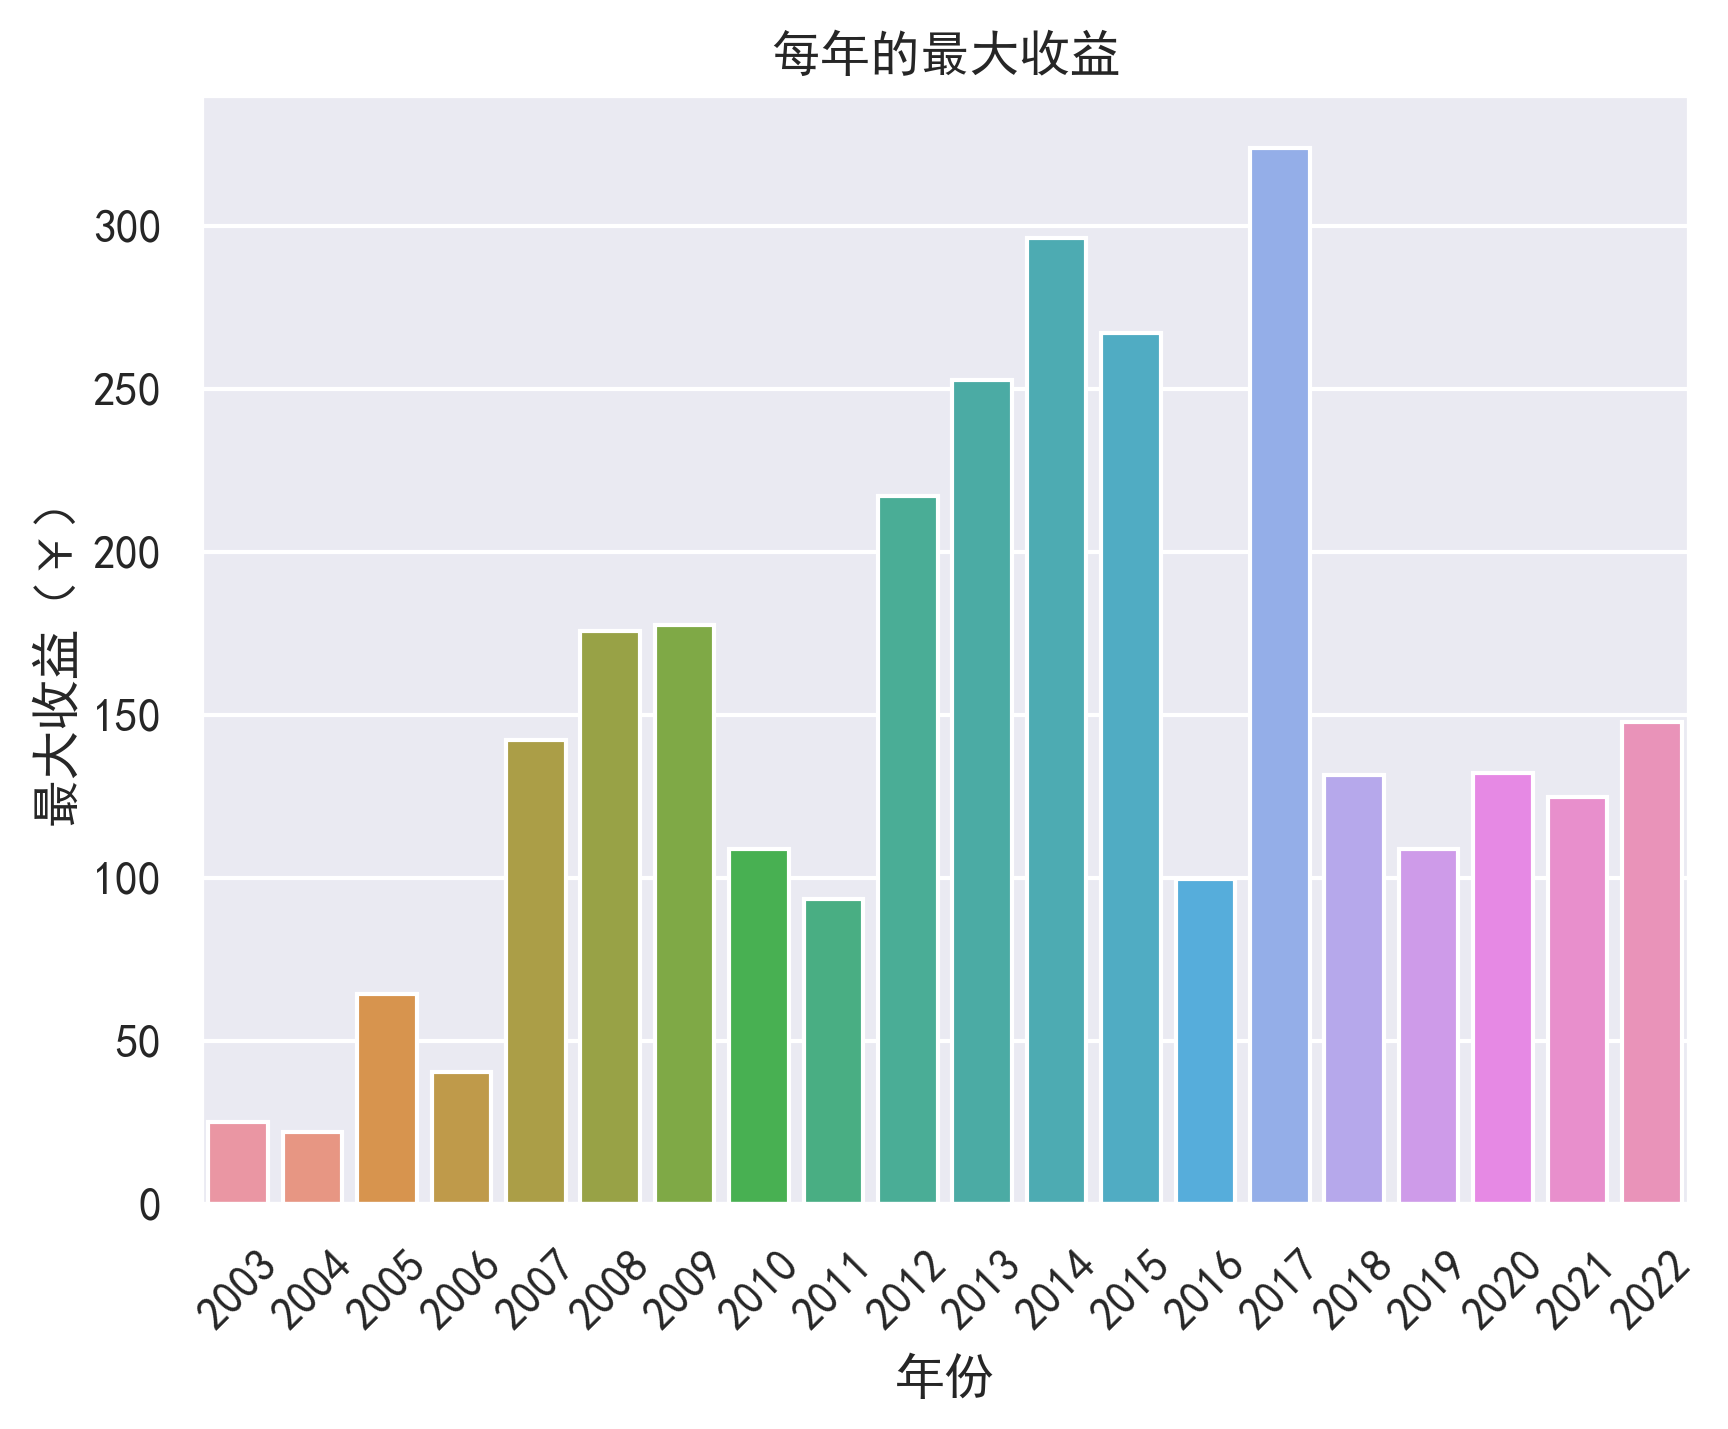

In [40]:
# 绘制每年的最大收益
sns.barplot(x='年份', y='最大收益', data=df)
plt.xticks(rotation=45)
plt.title('每年的最大收益')
plt.ylabel('最大收益（￥）')
plt.show()

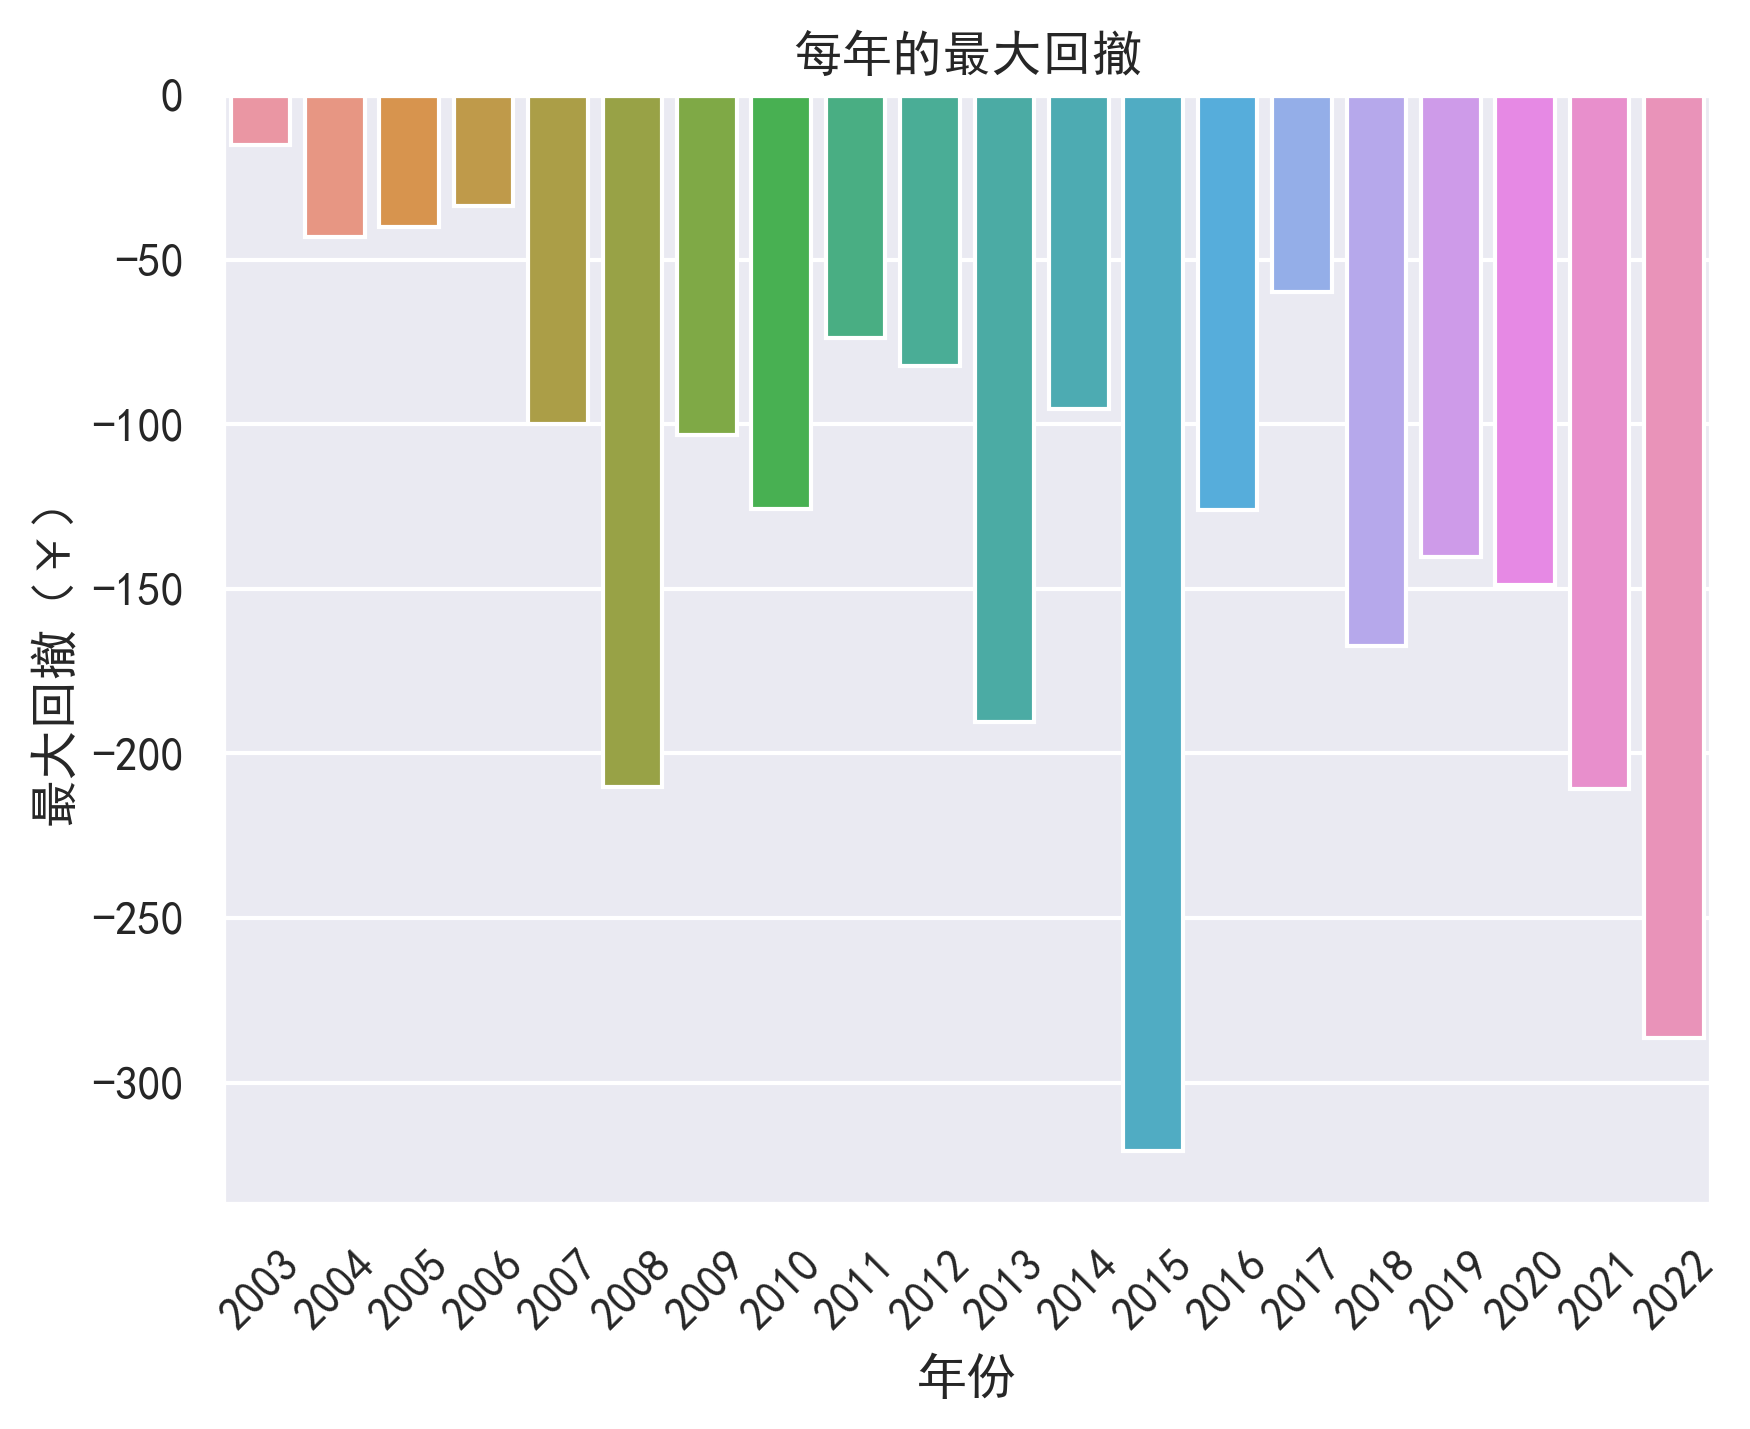

In [41]:
# 绘制每年的最大回撤
sns.barplot(x='年份', y='最大回撤', data=df)
plt.xticks(rotation=45)
plt.title('每年的最大回撤')
plt.ylabel('最大回撤（￥）')
plt.show()

In [42]:
print("程序运行时间：", time.time() - start_time, "s")

程序运行时间： 5.998514652252197 s
